In [1]:
import os
import numpy
import pandas
import seaborn
from matplotlib import pyplot
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
os.chdir('../')

In [5]:
from vector.utils.knot import sd_metric

In [7]:
d = './data/flows_example.xlsx'
data = pandas.read_excel(d, sheet_name='data')
data['date'] = pandas.to_datetime(data['date'])
data

,date,flow,open,high,low,close,adj_close,volume
0,2007-06-04,-806.342,153.539993,154.389999,149.059998,151.039993,108.561958,777324100
1,2007-06-11,9282.115,150.929993,153.660004,149.550003,153.070007,110.021034,829549100
2,2007-06-18,-5376.515,153.380005,153.580002,149.850006,150.550003,108.676132,786735600
3,2007-06-25,-4541.364,150.240005,151.649994,148.059998,150.429993,108.589546,1001504900
4,2007-07-02,460.736,150.869995,153.169998,150.770004,152.979996,110.430244,327793400
...,...,...,...,...,...,...,...,...
887,2024-06-03,-6884.416,529.020020,536.890015,522.599976,534.010010,532.292786,203111800
888,2024-06-10,-7475.545,533.179993,544.119995,532.049988,542.780029,541.034607,220214800
889,2024-06-17,-11956.611,542.080017,550.119995,541.609985,544.510010,542.759033,232058000
890,2024-06-24,16678.358,544.330017,550.280029,542.440002,544.219971,544.219971,233538600


In [8]:
data['v_s4w'] = data['volume'].rolling(window=4).sum()
data['f_s4w'] = data['flow'].rolling(window=4).sum()
data['v_s12w'] = data['volume'].rolling(window=12).sum()
data['f_s12w'] = data['flow'].rolling(window=12).sum()

data['y_instant'] = data['adj_close'].pct_change(periods=1)
data['v_instant'] = data['volume'].pct_change(periods=1)
data['f_instant'] = data['flow'].pct_change(periods=1)
data['y_p4w'] = data['adj_close'].pct_change(periods=4)
data['y_p12w'] = data['adj_close'].pct_change(periods=12)

data['y_instant_f'] = data['y_instant'].shift(-1)
data['y_p4w_f'] = data['y_p4w'].shift(-4)
data['y_p12w_f'] = data['y_p12w'].shift(-12)

data['v_s4w_p1w'] = data['volume'].rolling(window=4).sum().pct_change(periods=1)
data['f_s4w_p1w'] = data['flow'].rolling(window=4).sum().pct_change(periods=1)
data['v_s12w_p1w'] = data['volume'].rolling(window=12).sum().pct_change(periods=1)
data['f_s12w_p1w'] = data['flow'].rolling(window=12).sum().pct_change(periods=1)
data['v_s4w_p4w'] = data['volume'].rolling(window=4).sum().pct_change(periods=4)
data['f_s4w_p4w'] = data['flow'].rolling(window=4).sum().pct_change(periods=4)
data['v_s12w_p4w'] = data['volume'].rolling(window=12).sum().pct_change(periods=4)
data['f_s12w_p4w'] = data['flow'].rolling(window=12).sum().pct_change(periods=4)
data['v_s4w_p12w'] = data['volume'].rolling(window=4).sum().pct_change(periods=12)
data['f_s4w_p12w'] = data['flow'].rolling(window=4).sum().pct_change(periods=12)
data['v_s12w_p12w'] = data['volume'].rolling(window=12).sum().pct_change(periods=12)
data['f_s12w_p12w'] = data['flow'].rolling(window=12).sum().pct_change(periods=12)

data['v_m4w_p1w'] = data['volume'].rolling(window=4).mean().pct_change(periods=1)
data['f_m4w_p1w'] = data['flow'].rolling(window=4).mean().pct_change(periods=1)
data['v_m12w_p1w'] = data['volume'].rolling(window=12).mean().pct_change(periods=1)
data['f_m12w_p1w'] = data['flow'].rolling(window=12).mean().pct_change(periods=1)
data['v_m4w_p4w'] = data['volume'].rolling(window=4).mean().pct_change(periods=4)
data['f_m4w_p4w'] = data['flow'].rolling(window=4).mean().pct_change(periods=4)
data['v_m12w_p4w'] = data['volume'].rolling(window=12).mean().pct_change(periods=4)
data['f_m12w_p4w'] = data['flow'].rolling(window=12).mean().pct_change(periods=4)
data['v_m4w_p12w'] = data['volume'].rolling(window=4).mean().pct_change(periods=12)
data['f_m4w_p12w'] = data['flow'].rolling(window=4).mean().pct_change(periods=12)
data['v_m12w_p12w'] = data['volume'].rolling(window=12).mean().pct_change(periods=12)
data['f_m12w_p12w'] = data['flow'].rolling(window=12).mean().pct_change(periods=12)

data['f_win4m'] = data['flow'] / data['flow'].rolling(window=4).mean() - 1
data['f_win12m'] = data['flow'] / data['flow'].rolling(window=12).mean() - 1
data['f_win12x4m'] = data['flow'].rolling(window=4).mean() / data['flow'].rolling(window=12).mean() - 1

data['f_tot'] = data['flow'].cumsum() + 500_000
data['f_rate'] = data['flow'] / data['f_tot']
data['f_rate_4s'] = data['flow'].rolling(window=4).sum() / data['f_tot']
data['f_rate_12s'] = data['flow'].rolling(window=12).sum() / data['f_tot']

data['gate_instant'] = data['flow'] / data['volume']
data['gate_4w'] = data['flow'].rolling(window=4).sum() / data['volume'].rolling(window=4).sum()
data['gate_12w'] = data['flow'].rolling(window=12).sum() / data['volume'].rolling(window=12).sum()

print("lost {0} out of {1} ({2:.2f}% of the data)".format(data.shape[0] - data.dropna().shape[0], data.shape[0], (data.dropna().shape[0] / data.shape[0]) - 1))

data = data.dropna()
data

lost 35 out of 892 (-0.04% of the data)


,date,flow,open,high,low,close,adj_close,volume,v_s4w,f_s4w,...,f_win4m,f_win12m,f_win12x4m,f_tot,f_rate,f_rate_4s,f_rate_12s,gate_instant,gate_4w,gate_12w
23,2007-11-12,4211.523,145.210007,149.399994,143.699997,145.789993,105.739326,1236645700,4.907856e+09,-1207.714,...,-14.948743,45.280218,-4.317877,515871.153,0.008164,-0.002341,0.002117,3.405602e-06,-2.460777e-07,9.927965e-08
24,2007-11-19,-3876.850,145.279999,145.529999,141.669998,144.130005,104.535316,1019214300,4.744442e+09,84.860,...,-183.740985,24.730081,-1.140801,511994.303,-0.007572,0.000166,-0.003531,-3.803763e-06,1.788619e-08,-1.628797e-07
25,2007-11-26,4879.096,144.429993,149.869995,140.660004,148.660004,107.820885,1189044700,4.808441e+09,5804.913,...,2.362046,6.407116,1.203157,516873.399,0.009440,0.011231,0.015293,4.103375e-06,1.207234e-06,6.790680e-07
26,2007-12-03,4248.987,148.190002,151.500000,146.309998,150.910004,109.452789,757531800,4.202436e+09,9462.756,...,0.796089,3.650740,1.589371,521122.386,0.008154,0.018158,0.021038,5.608988e-06,2.251731e-06,9.436761e-07
27,2007-12-10,8291.546,151.279999,152.889999,147.100006,147.169998,106.740234,1093400500,4.059191e+09,13542.779,...,1.448994,20.076482,7.606180,529413.932,0.015662,0.025581,0.008917,7.583265e-06,3.336324e-06,3.991544e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,2024-03-11,-2577.520,510.480011,517.380005,508.119995,509.829987,506.616455,408533300,1.330192e+09,-2790.372,...,2.694877,-0.166114,-0.774313,614721.822,-0.004193,-0.004539,-0.060339,-6.309204e-06,-2.097722e-06,-8.751489e-06
876,2024-03-18,24167.275,514.000000,524.109985,511.119995,521.210022,519.533936,358522300,1.419649e+09,20935.954,...,3.617373,-32.226825,-7.762899,638889.097,0.037827,0.032769,-0.014536,6.740801e-05,1.474727e-05,-2.172897e-06
877,2024-03-25,86.620,519.799988,524.609985,518.400024,523.070007,521.387939,293270500,1.396441e+09,18152.302,...,-0.980913,-2.069453,-57.029313,638975.717,0.000136,0.028408,-0.001521,2.953587e-07,1.299898e-05,-2.330871e-07
878,2024-04-01,-2585.026,523.830017,524.380005,512.760010,518.429993,516.762878,367203800,1.427530e+09,19091.349,...,-1.541612,-7.569284,11.129133,636390.691,-0.004062,0.029999,0.007420,-7.039758e-06,1.337369e-05,1.126158e-06


In [9]:
data[['y_instant', 'y_instant_f', 'y_p4w', 'y_p4w_f']]

,y_instant,y_instant_f,y_p4w,y_p4w_f
23,0.004479,-0.011387,-0.025924,0.009466
24,-0.011387,0.031430,-0.061776,0.027753
25,0.031430,0.015135,-0.016800,-0.003889
26,0.015135,-0.024783,0.039755,-0.058644
27,-0.024783,0.006523,0.009466,-0.042646
...,...,...,...,...
875,-0.003693,0.025498,0.020660,0.005114
876,0.025498,0.003569,0.029496,-0.049980
877,0.003569,-0.008871,0.023097,-0.028314
878,-0.008871,-0.014621,0.016260,-0.013772


In [10]:
bb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
data['f_flag_in4m'] = bb.fit_transform(data['f_win4m'].values.reshape(-1, 1)).flatten()
data['f_flag_in12m'] = bb.fit_transform(data['f_win12m'].values.reshape(-1, 1)).flatten()
data['f_flag_in12x4m'] = bb.fit_transform(data['f_win12x4m'].values.reshape(-1, 1)).flatten()
data['f_rate_buck'] = bb.fit_transform(data['f_rate'].values.reshape(-1, 1)).flatten()
data['f_rate_s4_buck'] = bb.fit_transform(data['f_rate_4s'].values.reshape(-1, 1)).flatten()
data['f_rate_s12_buck'] = bb.fit_transform(data['f_rate_12s'].values.reshape(-1, 1)).flatten()
data['gate_instant_buck'] = bb.fit_transform(data['gate_instant'].values.reshape(-1, 1)).flatten()
data['gate_4w_buck'] = bb.fit_transform(data['gate_4w'].values.reshape(-1, 1)).flatten()
data['gate_12w_buck'] = bb.fit_transform(data['gate_12w'].values.reshape(-1, 1)).flatten()
data

C:\Users\Edward\AppData\Local\Temp\ipykernel_14740\2983833863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['f_flag_in4m'] = bb.fit_transform(data['f_win4m'].values.reshape(-1, 1)).flatten()
C:\Users\Edward\AppData\Local\Temp\ipykernel_14740\2983833863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['f_flag_in12m'] = bb.fit_transform(data['f_win12m'].values.reshape(-1, 1)).flatten()
C:\Users\Edward\AppData\Local\Temp\ipykernel_14740\2983833863.py:4: SettingWithCopyWarning: 
A value is tr

,date,flow,open,high,low,close,adj_close,volume,v_s4w,f_s4w,...,gate_12w,f_flag_in4m,f_flag_in12m,f_flag_in12x4m,f_rate_buck,f_rate_s4_buck,f_rate_s12_buck,gate_instant_buck,gate_4w_buck,gate_12w_buck
23,2007-11-12,4211.523,145.210007,149.399994,143.699997,145.789993,105.739326,1236645700,4.907856e+09,-1207.714,...,9.927965e-08,0.0,3.0,0.0,3.0,1.0,2.0,2.0,1.0,1.0
24,2007-11-19,-3876.850,145.279999,145.529999,141.669998,144.130005,104.535316,1019214300,4.744442e+09,84.860,...,-1.628797e-07,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
25,2007-11-26,4879.096,144.429993,149.869995,140.660004,148.660004,107.820885,1189044700,4.808441e+09,5804.913,...,6.790680e-07,3.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0
26,2007-12-03,4248.987,148.190002,151.500000,146.309998,150.910004,109.452789,757531800,4.202436e+09,9462.756,...,9.436761e-07,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0
27,2007-12-10,8291.546,151.279999,152.889999,147.100006,147.169998,106.740234,1093400500,4.059191e+09,13542.779,...,3.991544e-07,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,2024-03-11,-2577.520,510.480011,517.380005,508.119995,509.829987,506.616455,408533300,1.330192e+09,-2790.372,...,-8.751489e-06,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
876,2024-03-18,24167.275,514.000000,524.109985,511.119995,521.210022,519.533936,358522300,1.419649e+09,20935.954,...,-2.172897e-06,3.0,0.0,0.0,3.0,3.0,0.0,3.0,3.0,0.0
877,2024-03-25,86.620,519.799988,524.609985,518.400024,523.070007,521.387939,293270500,1.396441e+09,18152.302,...,-2.330871e-07,1.0,1.0,0.0,2.0,3.0,1.0,2.0,3.0,1.0
878,2024-04-01,-2585.026,523.830017,524.380005,512.760010,518.429993,516.762878,367203800,1.427530e+09,19091.349,...,1.126158e-06,1.0,0.0,3.0,0.0,3.0,2.0,0.0,3.0,3.0


In [11]:
data[[x for x in data.columns if 'f_' in x]].describe()

,f_s4w,f_s12w,f_instant,f_s4w_p1w,f_s12w_p1w,f_s4w_p4w,f_s12w_p4w,f_s4w_p12w,f_s12w_p12w,f_m4w_p1w,...,f_tot,f_rate,f_rate_4s,f_rate_12s,f_flag_in4m,f_flag_in12m,f_flag_in12x4m,f_rate_buck,f_rate_s4_buck,f_rate_s12_buck
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,...,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,571.275063,1536.777029,-0.838720,0.363356,-0.326742,0.244038,-0.332770,1.964478,-0.901021,0.363356,...,576048.660615,0.000209,0.000909,0.002533,1.501750,1.501750,1.501750,1.501750,1.501750,1.501750
std,7807.966373,10653.370803,14.851408,20.755942,5.975807,20.200926,8.946423,78.179944,10.327240,20.755942,...,22981.780069,0.007495,0.013373,0.018232,1.119208,1.119208,1.119208,1.119208,1.119208,1.119208
min,-30302.103000,-37091.695000,-189.223862,-112.819040,-124.973833,-64.300117,-83.236698,-156.051804,-81.155591,-112.819040,...,511994.303000,-0.038142,-0.048756,-0.060339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3822.286000,-4786.568000,-2.160642,-1.163483,-0.804779,-2.151755,-1.494171,-1.941700,-2.165096,-1.163483,...,558345.388000,-0.003957,-0.006867,-0.008438,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,377.561000,1218.724000,-1.145204,-0.360856,-0.183940,-1.242058,-0.528803,-0.901904,-1.148216,-0.360856,...,577598.477000,-0.000096,0.000662,0.002117,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,4544.392000,6679.246000,-0.139120,0.363180,0.355585,-0.189532,0.330923,0.088688,-0.203446,0.363180,...,593296.625000,0.004169,0.007872,0.011456,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,47836.538000,51260.592000,161.237375,561.342181,53.881630,354.483137,163.510652,2115.591966,161.984531,561.342181,...,651813.517000,0.051914,0.073390,0.079084,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


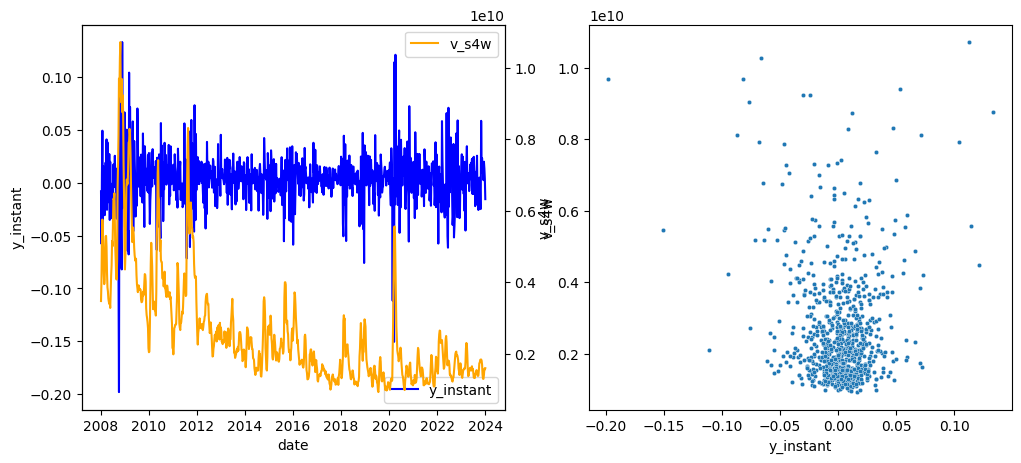

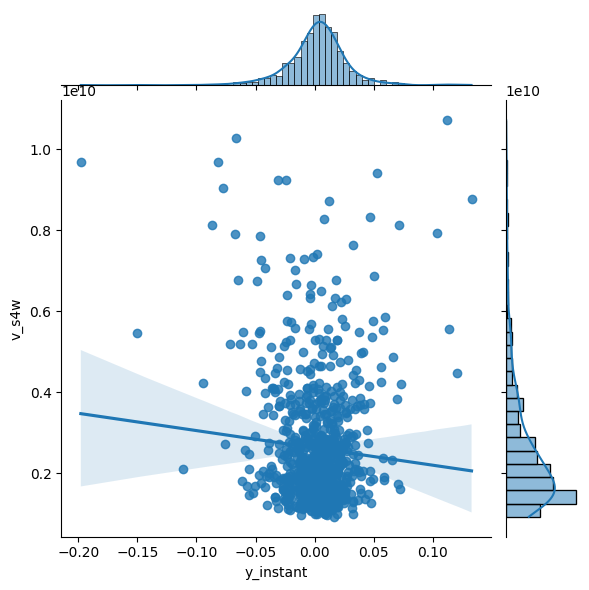

In [12]:
y_main = 'y_instant'
y_sub = 'v_s4w'
start, end = '2008-01-01', '2024-01-01'
start, end = pandas.to_datetime(start), pandas.to_datetime(end)
mask = (start <= data['date']) * (data['date'] <= end)
fig, ax = pyplot.subplots(1, 2, figsize=(12, 5))
az = ax[0].twinx()
seaborn.lineplot(data=data[mask], x='date', y=y_main, ax=ax[0], color='blue', label=y_main)
seaborn.lineplot(data=data[mask], x='date', y=y_sub, ax=az, color='orange', label=y_sub)
seaborn.scatterplot(data=data[mask], x=y_main, y=y_sub, ax=ax[1], s=10)
seaborn.jointplot(data=data[mask], x=y_main, y=y_sub, kind='reg')

0.2509157509157509


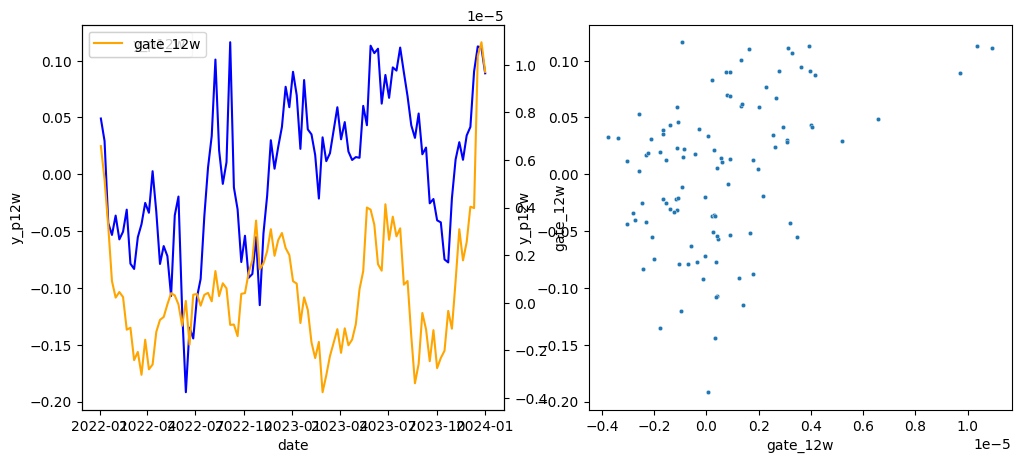

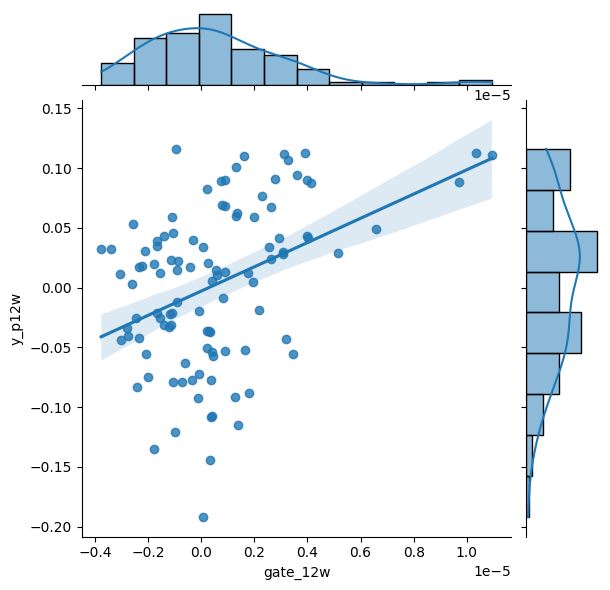

In [13]:
y_main = 'y_p12w'
y_sub = 'gate_12w'
start, end = '2022-01-01', '2024-01-01'
start, end = pandas.to_datetime(start), pandas.to_datetime(end)
sub_bot, sub_top = -numpy.inf, numpy.inf
# sub_bot, sub_top = -10, 10
mask = (start <= data['date']) * (data['date'] <= end) * (sub_bot <= data[y_sub]) * (data[y_sub] <= sub_top)
fig, ax = pyplot.subplots(1, 2, figsize=(12, 5))
az = ax[0].twinx()
seaborn.lineplot(data=data[mask], x='date', y=y_main, ax=ax[0], color='blue', label=y_main)
seaborn.lineplot(data=data[mask], x='date', y=y_sub, ax=az, color='orange', label=y_sub)
seaborn.scatterplot(data=data[mask], x=y_sub, y=y_main, ax=ax[1], s=10)
seaborn.jointplot(data=data[mask], x=y_sub, y=y_main, kind='reg')
print(sd_metric(x=data.loc[mask, y_sub].values, y=data.loc[mask, y_main].values))

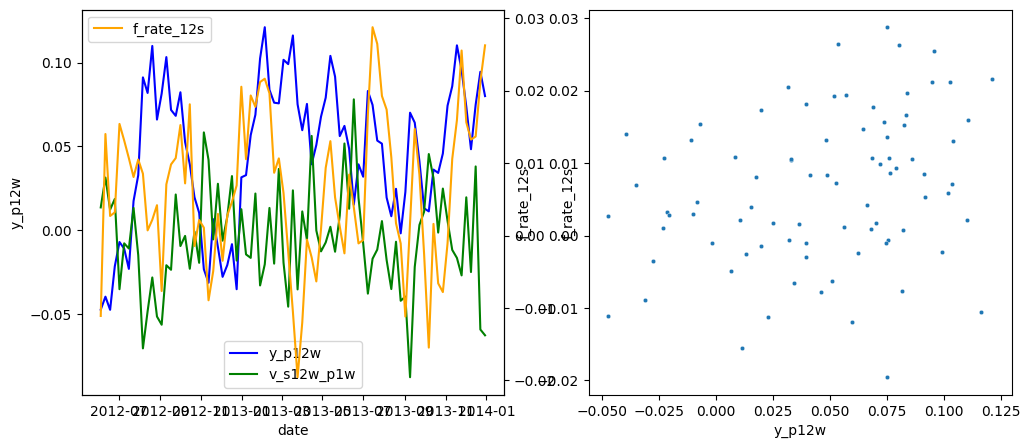

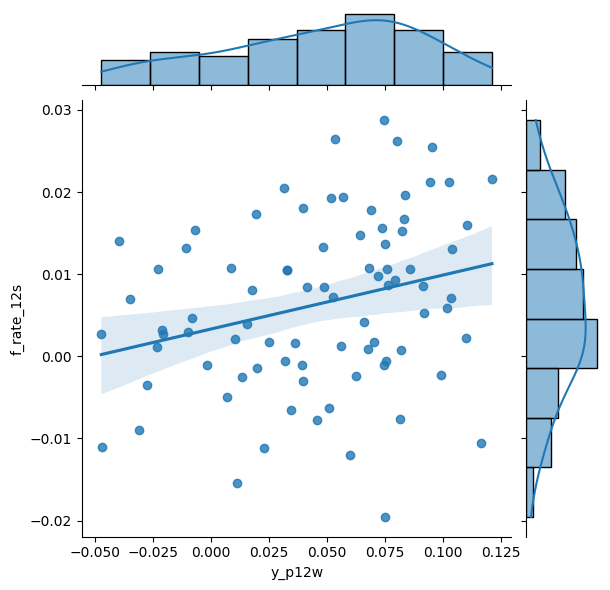

In [14]:
y_main = 'y_p12w'
y_sub = 'f_rate_12s'
y_tr = 'v_s12w_p1w'
start, end = '2012-06-01', '2014-01-01'
start, end = pandas.to_datetime(start), pandas.to_datetime(end)
# sub_bot, sub_top = -numpy.inf, numpy.inf
sub_bot, sub_top = -10, 10
mask = (start <= data['date']) * (data['date'] <= end) * (sub_bot <= data[y_sub]) * (data[y_sub] <= sub_top)
fig, ax = pyplot.subplots(1, 2, figsize=(12, 5))
az = ax[0].twinx()
seaborn.lineplot(data=data[mask], x='date', y=y_main, ax=ax[0], color='blue', label=y_main)
seaborn.lineplot(data=data[mask], x='date', y=y_sub, ax=az, color='orange', label=y_sub)
seaborn.lineplot(data=data[mask], x='date', y=y_tr, ax=ax[0], color='green', label=y_tr)
seaborn.scatterplot(data=data[mask], x=y_main, y=y_sub, ax=ax[1], s=10)
seaborn.jointplot(data=data[mask], x=y_main, y=y_sub, kind='reg')

<Axes: xlabel='y_p12w', ylabel='Count'>

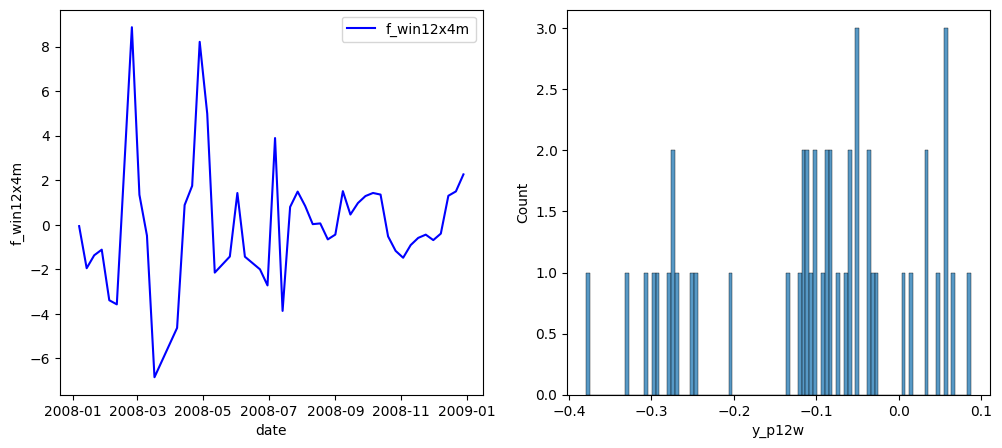

In [15]:
y_sub = 'f_win12x4m'
start, end = '2008-01-01', '2009-01-01'
start, end = pandas.to_datetime(start), pandas.to_datetime(end)
# sub_bot, sub_top = -numpy.inf, numpy.inf
sub_bot, sub_top = -10, 10
mask = (start <= data['date']) * (data['date'] <= end) * (sub_bot <= data[y_sub]) * (data[y_sub] <= sub_top)
fig, ax = pyplot.subplots(1, 2, figsize=(12, 5))
seaborn.lineplot(data=data[mask], x='date', y=y_sub, ax=ax[0], color='blue', label=y_sub)
seaborn.histplot(data=data[mask], x=y_main, ax=ax[1], bins=100)


<Axes: xlabel='date', ylabel='y_p12w_f'>

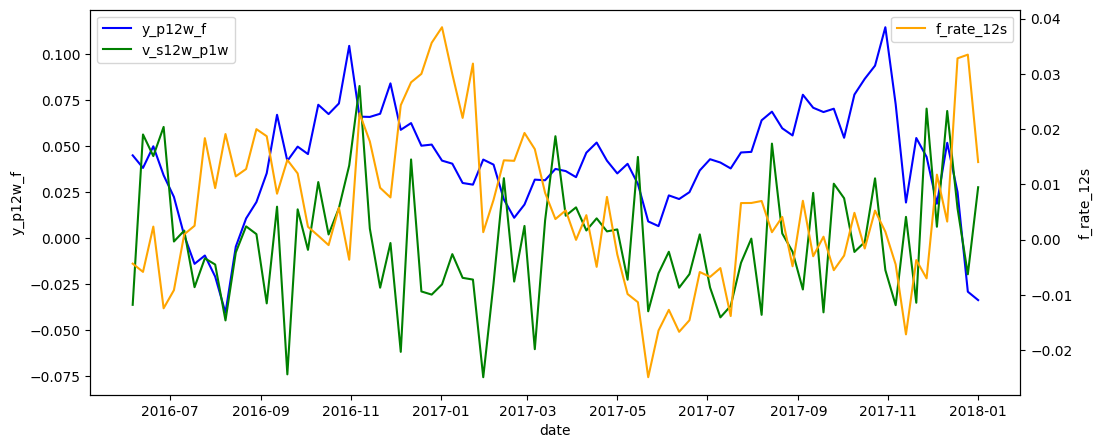

In [16]:
y_main = 'y_p12w_f'
y_sub = 'f_rate_12s'
y_tr = 'v_s12w_p1w'
start, end = '2016-06-01', '2018-01-01'
start, end = pandas.to_datetime(start), pandas.to_datetime(end)
# sub_bot, sub_top = -numpy.inf, numpy.inf
sub_bot, sub_top = -10, 10
mask = (start <= data['date']) * (data['date'] <= end) * (sub_bot <= data[y_sub]) * (data[y_sub] <= sub_top)
fig, ax = pyplot.subplots(1, 1, figsize=(12, 5))
az = ax.twinx()
seaborn.lineplot(data=data[mask], x='date', y=y_main, ax=ax, color='blue', label=y_main)
seaborn.lineplot(data=data[mask], x='date', y=y_sub, ax=az, color='orange', label=y_sub)
seaborn.lineplot(data=data[mask], x='date', y=y_tr, ax=ax, color='green', label=y_tr)

<Axes: xlabel='gate_12w_buck', ylabel='y_p12w_f'>

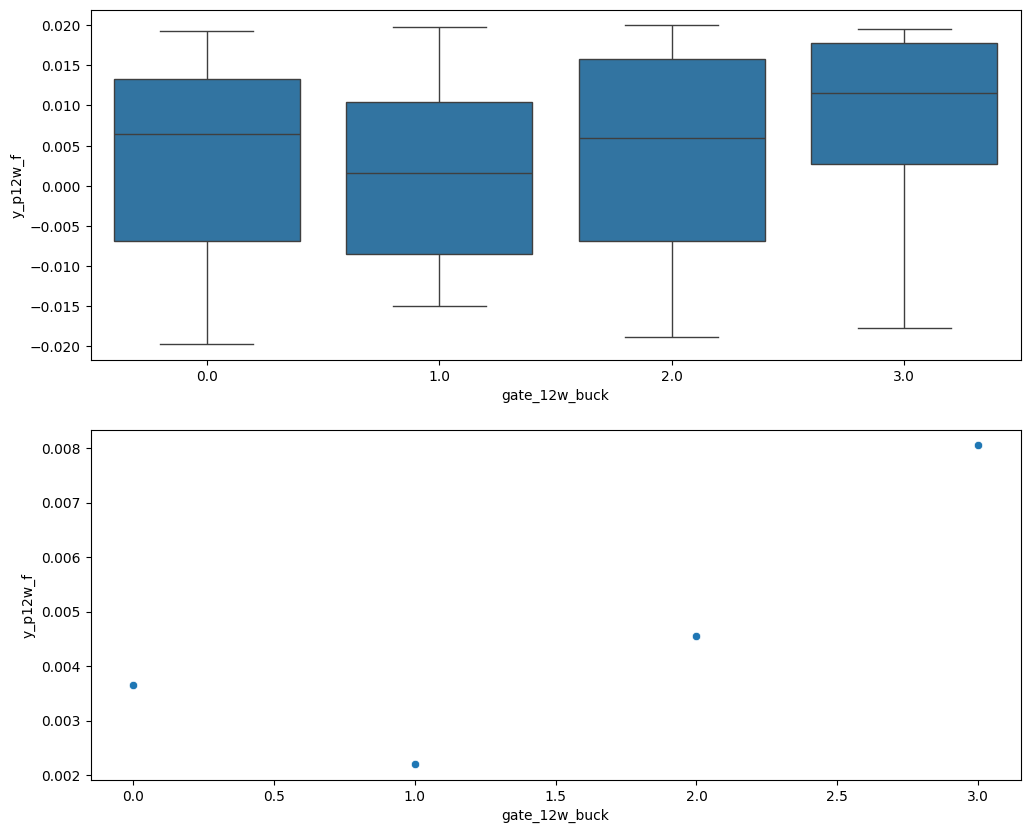

In [17]:
y_main = 'y_p12w_f'
# y_sub = 'f_rate_buck'
# y_sub = 'f_rate_s12_buck'
y_sub = 'gate_12w_buck'
start, end = '2008-06-01', '2024-01-01'
start, end = pandas.to_datetime(start), pandas.to_datetime(end)
# sub_bot, sub_top = -numpy.inf, numpy.inf
sub_bot, sub_top = -0.02, +0.02
mask = (start <= data['date']) * (data['date'] <= end) * (sub_bot <= data[y_main]) * (data[y_main] <= sub_top)
fig, ax = pyplot.subplots(2, 1, figsize=(12, 10))
seaborn.boxplot(data=data[mask], x=y_sub, y=y_main, ax=ax[0])
seaborn.scatterplot(data=data[mask].groupby(by=y_sub)[y_main].mean().reset_index(), x=y_sub, y=y_main, ax=ax[1])


In [18]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

[Text(0.5, 0.875, 'x[2] <= 2.5\nsquared_error = 0.006\nsamples = 857\nvalue = 0.026'),
 Text(0.25, 0.625, 'x[2] <= 1.5\nsquared_error = 0.006\nsamples = 642\nvalue = 0.023'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 1.5\nsquared_error = 0.006\nsamples = 428\nvalue = 0.028'),
 Text(0.0625, 0.125, 'squared_error = 0.005\nsamples = 262\nvalue = 0.032'),
 Text(0.1875, 0.125, 'squared_error = 0.006\nsamples = 166\nvalue = 0.021'),
 Text(0.375, 0.375, 'x[1] <= 0.5\nsquared_error = 0.008\nsamples = 214\nvalue = 0.014'),
 Text(0.3125, 0.125, 'squared_error = 0.006\nsamples = 41\nvalue = 0.029'),
 Text(0.4375, 0.125, 'squared_error = 0.008\nsamples = 173\nvalue = 0.011'),
 Text(0.75, 0.625, 'x[0] <= 1.5\nsquared_error = 0.005\nsamples = 215\nvalue = 0.035'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 0.5\nsquared_error = 0.006\nsamples = 77\nvalue = 0.039'),
 Text(0.5625, 0.125, 'squared_error = 0.007\nsamples = 29\nvalue = 0.028'),
 Text(0.6875, 0.125, 'squar

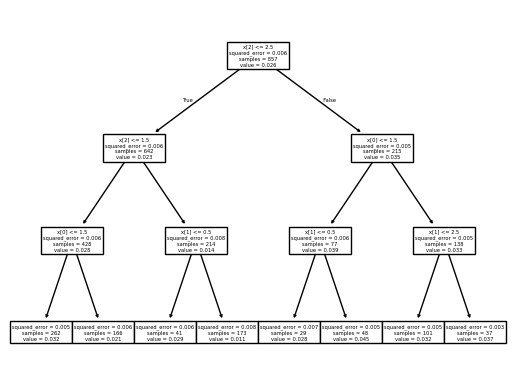

In [19]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X=data[['f_flag_in12m', 'f_flag_in4m', 'f_flag_in12x4m']], y=data['y_p12w_f'])
plot_tree(model)
# pyplot.savefig('out.svg')